# Creating a Spark session

In [2]:
from pyspark.sql import *
from pyspark.sql import functions as f
from pyspark.sql.types import *

spark = SparkSession.builder.appName("SparkIntro").getOrCreate()

In [3]:
sc._conf.get('spark.executor.memory')

NameError: name 'sc' is not defined

# The Spark UI
When you run a cell with Spark code in Jupyter, the code is submitted as a job to Spark. You can access the Spark UI on [http://127.0.0.1:4040/](http://127.0.0.1:4040/).

The Spark UI gives you all the information you need about your Spark job.

# The web traffic data

In [2]:
df = spark.read.option('delimiter', '\t').csv('/home/zach/Downloads/traffic_2')

In [3]:
df.show()

+---------------+-----------------+
|            _c0|              _c1|
+---------------+-----------------+
| 186.99.192.116|       python.org|
| 202.152.82.171|    wikipedia.org|
|130.126.231.205|       python.org|
|116.142.112.214|pandas.pydata.org|
|113.124.204.127|       python.org|
|  143.30.183.87|    wikipedia.org|
| 138.74.228.219|       python.org|
|  56.120.106.87|    wikipedia.org|
| 189.119.55.225|    wikipedia.org|
| 180.110.73.101|    wikipedia.org|
|125.147.103.124|       python.org|
|   89.161.15.82|    wikipedia.org|
| 64.108.133.139|pandas.pydata.org|
|   87.91.133.89|pandas.pydata.org|
|111.141.147.118|    wikipedia.org|
|    97.65.99.76|    wikipedia.org|
|   80.99.56.157|    wikipedia.org|
| 122.86.146.117|    wikipedia.org|
| 200.132.86.152|pandas.pydata.org|
|  98.200.179.72|       python.org|
+---------------+-----------------+
only showing top 20 rows



In [4]:
distinct_ips = df.groupBy('_c1').agg(f.countDistinct('_c0'))

In [5]:
distinct_ips.show()

Py4JJavaError: An error occurred while calling o42.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 6 in stage 2.0 failed 1 times, most recent failure: Lost task 6.0 in stage 2.0 (TID 8, localhost, executor driver): java.lang.OutOfMemoryError: Java heap space
	at org.apache.spark.util.collection.unsafe.sort.UnsafeSorterSpillReader.<init>(UnsafeSorterSpillReader.java:52)
	at org.apache.spark.util.collection.unsafe.sort.UnsafeSorterSpillWriter.getReader(UnsafeSorterSpillWriter.java:156)
	at org.apache.spark.util.collection.unsafe.sort.UnsafeExternalSorter.getSortedIterator(UnsafeExternalSorter.java:477)
	at org.apache.spark.sql.execution.UnsafeKVExternalSorter.sortedIterator(UnsafeKVExternalSorter.java:204)
	at org.apache.spark.sql.execution.aggregate.HashAggregateExec.finishAggregate(HashAggregateExec.scala:383)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.agg_doAggregateWithKeys_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:636)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:125)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:55)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1889)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1877)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1876)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1876)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2110)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:365)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$collectFromPlan(Dataset.scala:3389)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2550)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2550)
	at org.apache.spark.sql.Dataset$$anonfun$52.apply(Dataset.scala:3370)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withNewExecutionId$1.apply(SQLExecution.scala:78)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:73)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3369)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2550)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2764)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:254)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:291)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.lang.OutOfMemoryError: Java heap space
	at org.apache.spark.util.collection.unsafe.sort.UnsafeSorterSpillReader.<init>(UnsafeSorterSpillReader.java:52)
	at org.apache.spark.util.collection.unsafe.sort.UnsafeSorterSpillWriter.getReader(UnsafeSorterSpillWriter.java:156)
	at org.apache.spark.util.collection.unsafe.sort.UnsafeExternalSorter.getSortedIterator(UnsafeExternalSorter.java:477)
	at org.apache.spark.sql.execution.UnsafeKVExternalSorter.sortedIterator(UnsafeKVExternalSorter.java:204)
	at org.apache.spark.sql.execution.aggregate.HashAggregateExec.finishAggregate(HashAggregateExec.scala:383)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.agg_doAggregateWithKeys_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:636)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:125)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:55)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [18]:
distinct_ips.explain()

== Physical Plan ==
*(3) HashAggregate(keys=[_c1#105], functions=[count(distinct _c0#104)])
+- Exchange hashpartitioning(_c1#105, 200)
   +- *(2) HashAggregate(keys=[_c1#105], functions=[partial_count(distinct _c0#104)])
      +- *(2) HashAggregate(keys=[_c1#105, _c0#104], functions=[])
         +- Exchange hashpartitioning(_c1#105, _c0#104, 200)
            +- *(1) HashAggregate(keys=[_c1#105, _c0#104], functions=[])
               +- *(1) FileScan csv [_c0#104,_c1#105] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/home/jovyan/work/data/traffic_2], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<_c0:string,_c1:string>


## Ex 2.

In [3]:
titan_df = spark.read.option('header', True).option('inferSchema', True).csv("data/titanic.csv")

In [4]:
titan_df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|   false|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|    true|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|    true|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|    true|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|   false|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          6|   false|     3|    Moran, Mr. James|  male|null|    0|    0|      

In [10]:
titan_df = titan_df.where("Age is not null")

In [17]:
titan_df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|   false|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|    true|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|    true|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|    true|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|   false|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          7|   false|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0|      

In [18]:
titan_df["Age_Bracket"] = titan_df.Age % 10

TypeError: 'DataFrame' object does not support item assignment

In [25]:
titan_df = titan_df.withColumn("Age_Bracket", f.floor(f.col('Age')/10))

In [44]:
age_hist = titan_df.groupby(f.col('Age_Bracket')).count().orderBy(f.col('Age_Bracket'))

In [45]:
age_hist.show()

+-----------+-----+
|Age_Bracket|count|
+-----------+-----+
|          0|   62|
|          1|  102|
|          2|  220|
|          3|  167|
|          4|   89|
|          5|   48|
|          6|   19|
|          7|    6|
|          8|    1|
+-----------+-----+



In [46]:
import matplotlib.pyplot as plt

<BarContainer object of 9 artists>

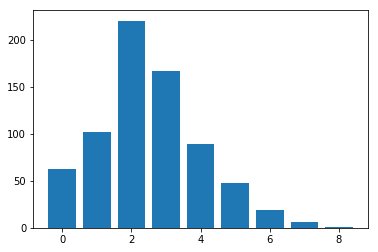

In [55]:
pddf = age_hist.toPandas()
plt.bar(pddf['Age_Bracket'], pddf['count'])

# Ex 3
Come back to this...

# EX 4.

In [57]:
!unzip ~/Downloads/simplemaps* -d ./data/simplemaps

Archive:  /home/zach/Downloads/simplemaps_worldcities_basicv1.5.zip
  inflating: ./data/simplemaps/license.txt  
  inflating: ./data/simplemaps/worldcities.csv  
  inflating: ./data/simplemaps/worldcities.xlsx  


In [59]:
cities = spark.read.option('header', True).option('inferSchema', True).csv('data/simplemaps/worldcities.csv')

In [60]:
cities.show()

+------------+------------+-------+-------+-------+----+----+------------+-------+----------+----------+
|        city|  city_ascii|    lat|    lng|country|iso2|iso3|  admin_name|capital|population|        id|
+------------+------------+-------+-------+-------+----+----+------------+-------+----------+----------+
|   Malishevë|   Malisheve|42.4822|20.7458| Kosovo|  XK| XKS|   Malishevë|  admin|      null|1901597212|
|     Prizren|     Prizren|42.2139|20.7397| Kosovo|  XK| XKS|     Prizren|  admin|      null|1901360309|
| Zubin Potok| Zubin Potok|42.9144|20.6897| Kosovo|  XK| XKS| Zubin Potok|  admin|      null|1901608808|
|    Kamenicë|    Kamenice|42.5781|21.5803| Kosovo|  XK| XKS|    Kamenicë|  admin|      null|1901851592|
|        Viti|        Viti|42.3214|21.3583| Kosovo|  XK| XKS|        Viti|  admin|      null|1901328795|
|    Shtërpcë|    Shterpce|42.2394|21.0272| Kosovo|  XK| XKS|    Shtërpcë|  admin|      null|1901828239|
|      Shtime|      Shtime|42.4331|21.0397| Kosovo|  XK

In [123]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2*asin(sqrt(a))
    r = 6371
    return round(c*r, 2)

In [124]:
pdcities = cities.toPandas()

In [90]:
norman = pdcities[pdcities.city == "Norman"]
okc = pdcities[pdcities.city == "Oklahoma City"]

In [92]:
haversine(norman.lng, norman.lat, okc.lng, okc.lat)

30.093570374953007

In [145]:
hs_dist_udf = f.udf(haversine, FloatType())

In [108]:
okc.iloc[0].lng

-97.5136

In [158]:
lng, lat = f.lit(okc.iloc[0].lng), f.lit(okc.iloc[0].lat)
n = 100000
cities = cities.withColumn("dist_to", hs_dist_udf(lng, lat, f.col('lng'), f.col('lat'))).orderBy(f.col("dist_to"))
cities.where(f.col("population") > n).show()

+-------------+-------------+-------+--------+-------------+----+----+----------+-------+----------+----------+-------+
|         city|   city_ascii|    lat|     lng|      country|iso2|iso3|admin_name|capital|population|        id|dist_to|
+-------------+-------------+-------+--------+-------------+----+----+----------+-------+----------+----------+-------+
|Oklahoma City|Oklahoma City|35.4676|-97.5136|United States|  US| USA|  Oklahoma|  admin|  955998.0|1840020428|    0.0|
|       Norman|       Norman|35.2335|-97.3471|United States|  US| USA|  Oklahoma|   null|  115065.0|1840020451|  30.09|
|        Tulsa|        Tulsa|36.1284|-95.9042|United States|  US| USA|  Oklahoma|   null|  672054.0|1840021672| 162.68|
| Broken Arrow| Broken Arrow|36.0365|-95.7808|United States|  US| USA|  Oklahoma|   null|  108303.0|1840019059| 168.68|
|      Wichita|      Wichita|37.6897|-97.3442|United States|  US| USA|    Kansas|   null|  483057.0|1840001686| 247.55|
|       Denton|       Denton|33.2176|-97

In [ ]:
cities..joinwithColumn("dist_to")

In [ ]:
cities.join(cities)